-----------------------------------------------------------------------------------------------------------
Analiza Corelațiilor
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

-----------------------------------------------------------------------------------------------------------
1.	Determinați dacă există o corelație între:

◦	price (preț) și points (rating)


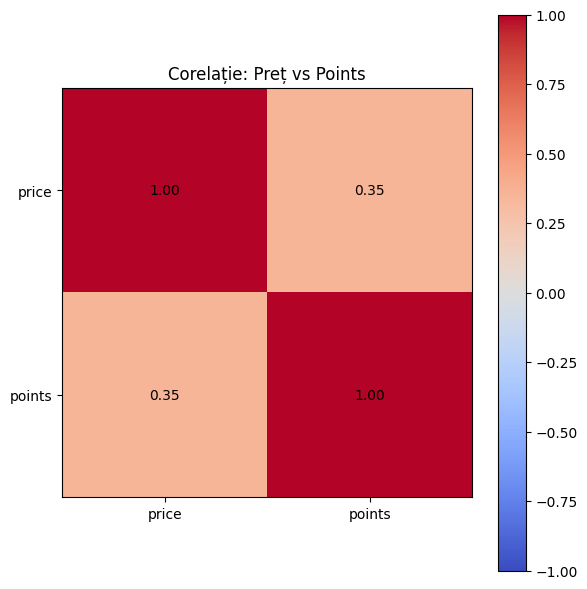

In [21]:
df = pd.read_csv("wine_clean_final.csv")

corr = df[['price','points']].corr()

plt.figure(figsize=(6,6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks([0,1], ['price','points'])
plt.yticks([0,1], ['price','points'])
plt.title("Corelație: Preț vs Points")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()


◦	alcohol și points

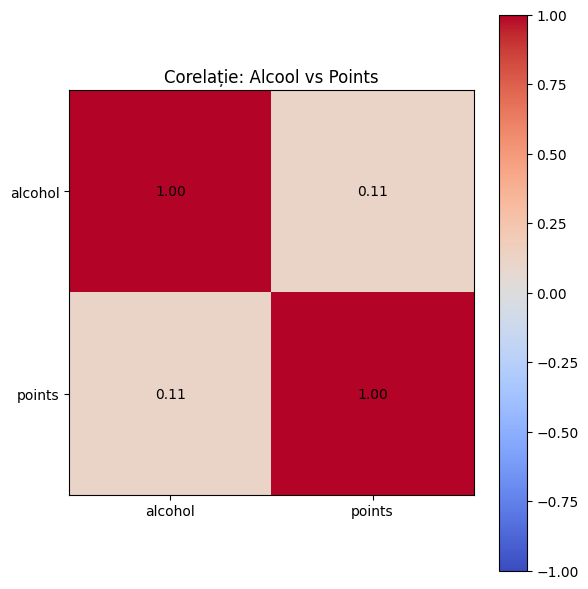

In [22]:
df = pd.read_csv("wine_clean_final.csv")

corr = df[['alcohol','points']].corr()

plt.figure(figsize=(6,6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks([0,1], ['alcohol','points'])
plt.yticks([0,1], ['alcohol','points'])
plt.title("Corelație: Alcool vs Points")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()

◦	regiune și preț/points

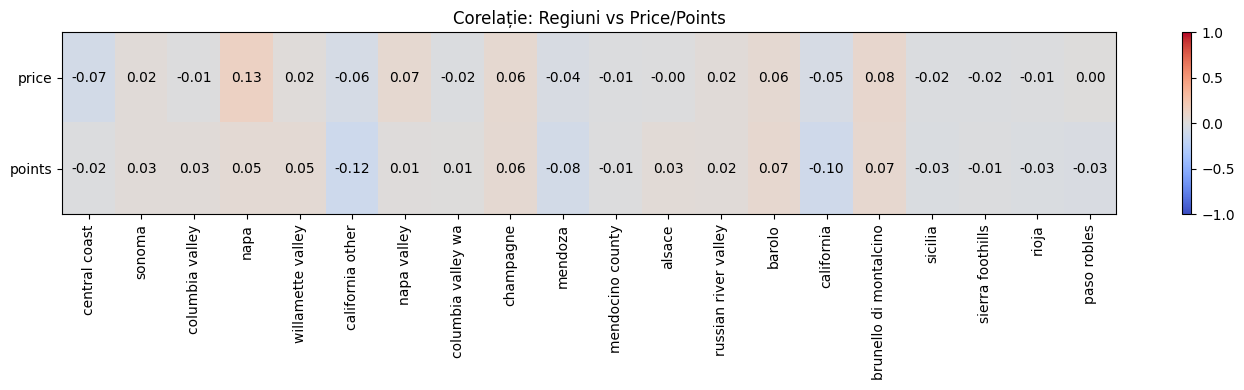

In [23]:
df = pd.read_csv("wine_clean_final.csv")

top_regions = df['region_1'].value_counts().head(20).index
ohe = pd.get_dummies(df['region_1'])[top_regions]

corr = pd.concat([df[['price','points']], ohe], axis=1).corr().iloc[:2,2:]

plt.figure(figsize=(14,4))
plt.imshow(corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
plt.yticks([0,1], ['price','points'])
plt.title("Corelație: Regiuni vs Price/Points")
plt.colorbar()

for i in range(2):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()


◦	varitati de struguri și preț/points

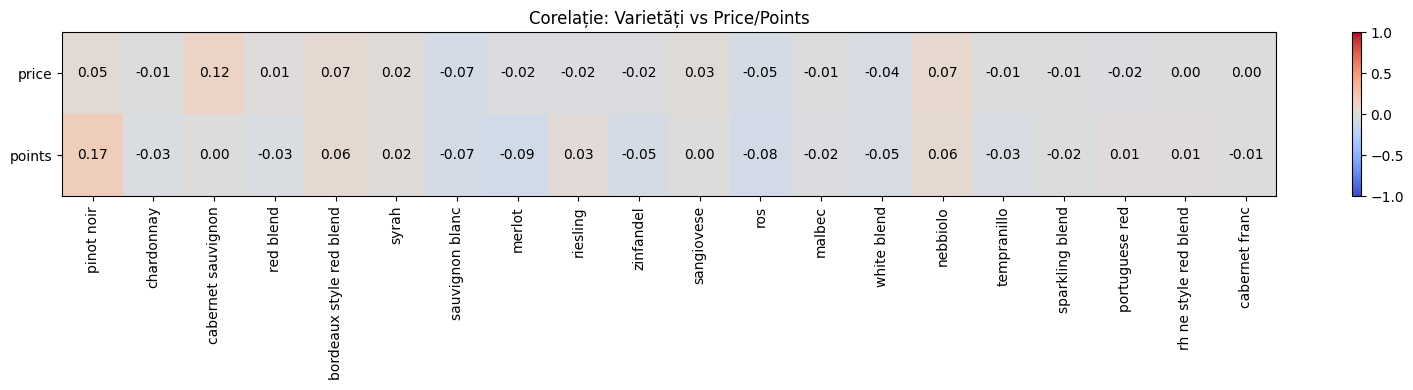

In [24]:
df = pd.read_csv("wine_clean_final.csv")

top_var = df['variety'].value_counts().head(20).index
ohe = pd.get_dummies(df['variety'])[top_var]

corr = pd.concat([df[['price','points']], ohe], axis=1).corr().iloc[:2,2:]

plt.figure(figsize=(16,4))
plt.imshow(corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
plt.yticks([0,1], ['price','points'])
plt.title("Corelație: Varietăți vs Price/Points")
plt.colorbar()

for i in range(2):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------------

2.	Word correlation analysis

Vizualizați corelațiile folosind:

◦	Efectuați o analiză de corelare a cuvintelor cele mai frecvente cu prețul și ratingul


=== Correlation top words with price & points ===
         tannins   acidity    cherry     black      ripe     drink      nose  \
price   0.097210 -0.005517  0.055289  0.102070  0.028252  0.075399 -0.040061   
points  0.129811  0.053138  0.054243  0.173317  0.107419  0.105521  0.035336   

             red       oak     spice      rich       dry     fresh     sweet  \
price   0.000169  0.061423  0.021989  0.080904 -0.025411 -0.047762 -0.014054   
points  0.021577  0.042207  0.083491  0.166262 -0.051206  0.024067 -0.082994   

           berry      plum  blackberry      soft     apple      dark  
price  -0.004913  0.005008    0.048397 -0.008956 -0.055590  0.059777  
points -0.016913  0.028735    0.046908 -0.090946 -0.020296  0.116503  


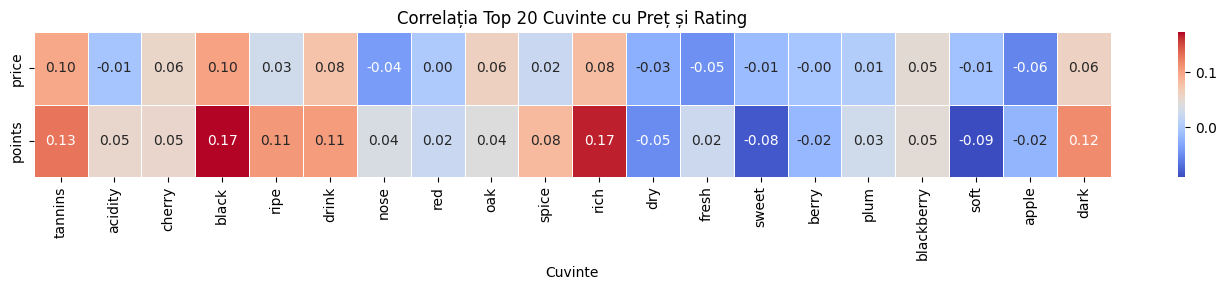

In [25]:
df = pd.read_csv("wine_clean_final.csv")

#  Identificăm cele mai frecvente 20 cuvinte
all_words = " ".join(df["description"].dropna())
words = re.findall(r'\b[a-z0-9]+\b', all_words)
word_counts = Counter(words)

top20_words = [w for w, c in word_counts.most_common(20)]
# print("\nTop 20 Words:", top20_words)

# Creăm o coloană pentru fiecare cuvânt (numărul de apariții în fiecare descriere)
for word in top20_words:
    df[f"{word}"] = df["description"].str.count(rf"\b{word}\b")

# CORELAȚIA cu price și points
corr_cols = [f"{w}" for w in top20_words] + ["price", "points"]

corr_matrix = df[corr_cols].corr().loc[["price", "points"], top20_words]
# corr_matrix = df[corr_cols].corr()[["price", "points"]].iloc[:-2]

print("\n=== Correlation top words with price & points ===")
print(corr_matrix)


#  Vizualizare Heatmap Price & Points
plt.figure(figsize=(14, 3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlația Top 20 Cuvinte cu Preț și Rating")
plt.xlabel("Cuvinte")
plt.tight_layout()
plt.show()



◦	Efectuați o analiză de corelare a cuvintelor cele mai frecvente cu soiuri

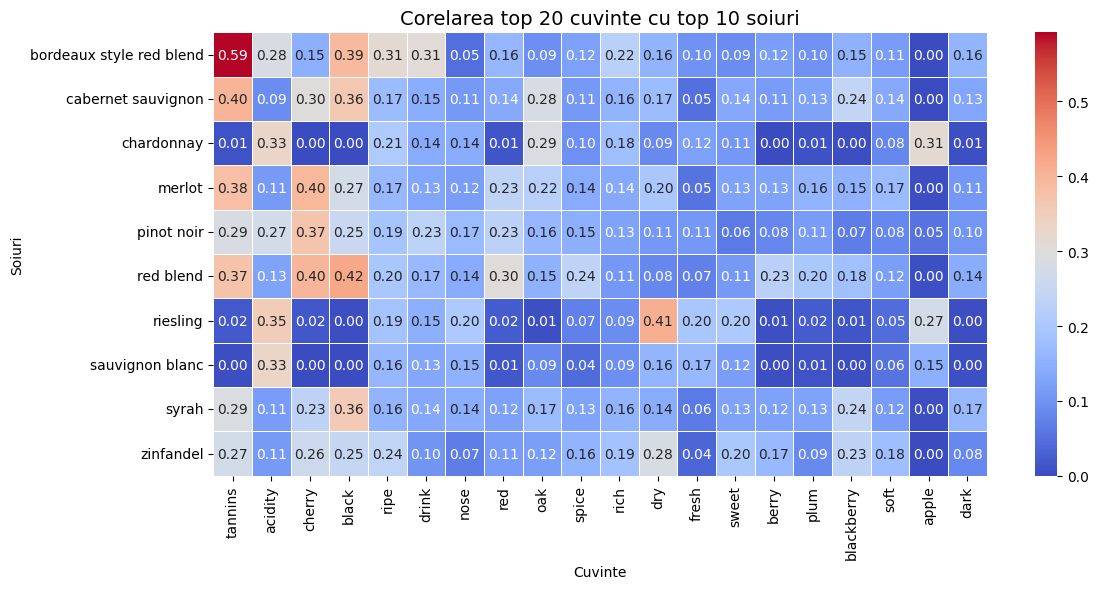

In [26]:
df = pd.read_csv("wine_clean_final.csv")
df['variety'] = df['variety']

# Top 20 cuvinte
all_words = " ".join(df['description'].astype(str))
words = re.findall(r'\b\w+\b', all_words.lower())
top20_words = [w for w, c in Counter(words).most_common(20)]

# Frecventa fiecarui cuvant în fiecare descriere
for word in top20_words:
    df[word] = df['description'].str.count(r'\b{}\b'.format(word))

# Top 10 soiuri cu cele mai multe înregistrări
top_varieties = df['variety'].value_counts().head(10).index
df_top = df[df['variety'].isin(top_varieties)]

# Medie frecventa cuvinte pe soiuri
df_grouped = df_top.groupby('variety')[top20_words].mean()


plt.figure(figsize=(12,6))
sns.heatmap(df_grouped, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Corelarea top 20 cuvinte cu top 10 soiuri", fontsize=14)
plt.xlabel("Cuvinte")
plt.ylabel("Soiuri")
plt.tight_layout()
plt.show()



◦	Heatmap pentru corelațiile numerice

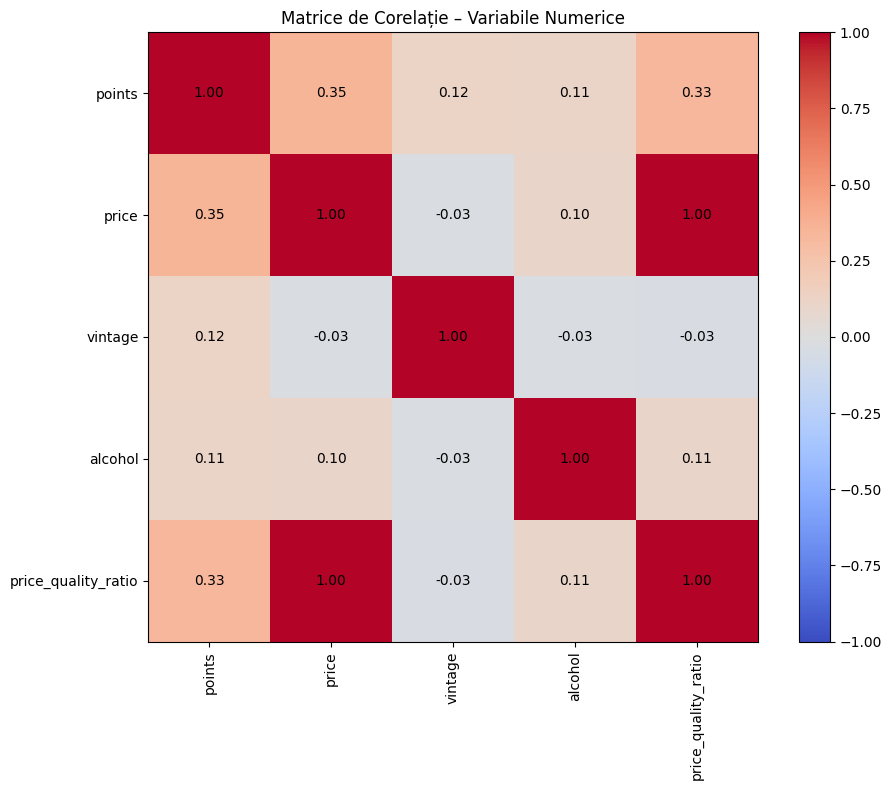

In [27]:
df = pd.read_csv("wine_clean_final.csv")

def annotate_heatmap(matrix, ax):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, f"{matrix[i, j]:.2f}", ha="center", va="center")

df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
ax = plt.gca()
im = ax.imshow(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matrice de Corelație – Variabile Numerice")
plt.colorbar(im)
annotate_heatmap(corr_matrix.values, ax)
plt.tight_layout()
plt.show()


◦	Scatter plots pentru relații individuale

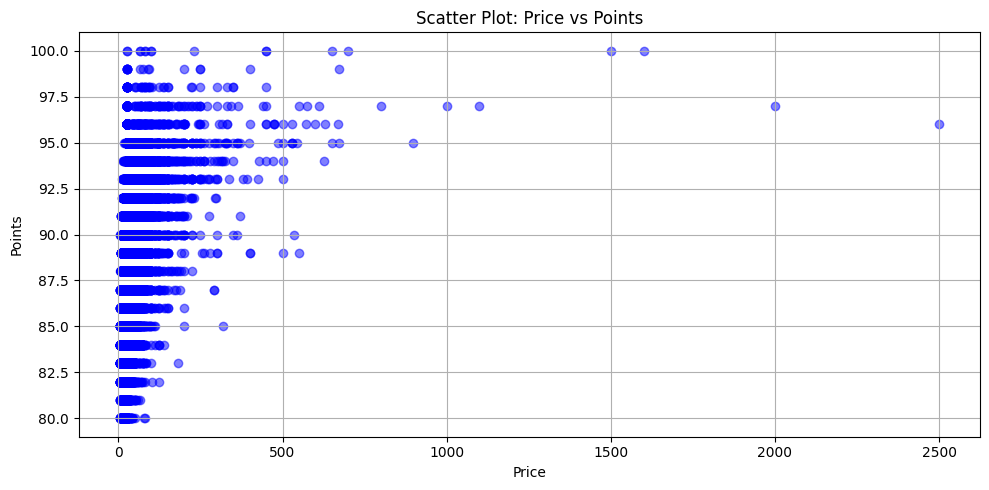

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wine_clean_final.csv")

plt.figure(figsize=(10,5))
plt.scatter(df['price'], df['points'], alpha=0.5, c='blue')
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Scatter Plot: Price vs Points')
plt.grid(True)
plt.tight_layout()
plt.show()


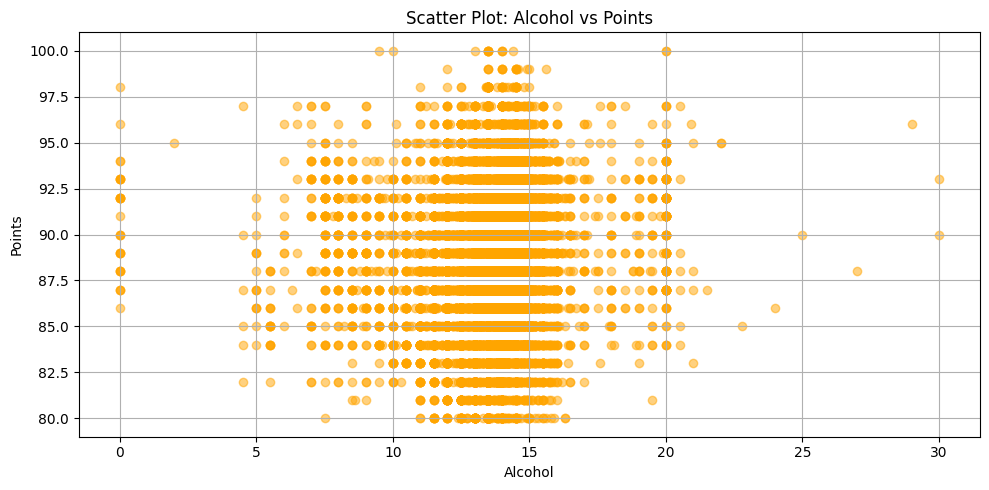

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wine_clean_final.csv")

plt.figure(figsize=(10,5))
plt.scatter(df['alcohol'], df['points'], alpha=0.5, c='orange')
plt.xlabel('Alcohol')
plt.ylabel('Points')
plt.title('Scatter Plot: Alcohol vs Points')
plt.grid(True)
plt.tight_layout()
plt.show()